In [42]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [2]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [3]:
df = pd.read_csv("cleaned_data.csv", index_col=0, parse_dates=True, infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 369 entries, 1990-01-01 to 2021-08-01
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   CANLORSGPNOSTSAM                      369 non-null    float64
 1   inflation_common                      369 non-null    float64
 2   inflation_trimmed_median              369 non-null    float64
 3   inflation_weighted_median             369 non-null    float64
 4   employment_rate                       369 non-null    float64
 5   unemployment_rate                     369 non-null    float64
 6   participation_rate                    369 non-null    float64
 7   5_year_bond_benchmark                 369 non-null    float64
 8   10_year_bond_benchmark                369 non-null    float64
 9   long_term_bond_benchmark              369 non-null    float64
 10  Bank of Canada Target Overnight Rate  369 non-null    float64
 11  

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

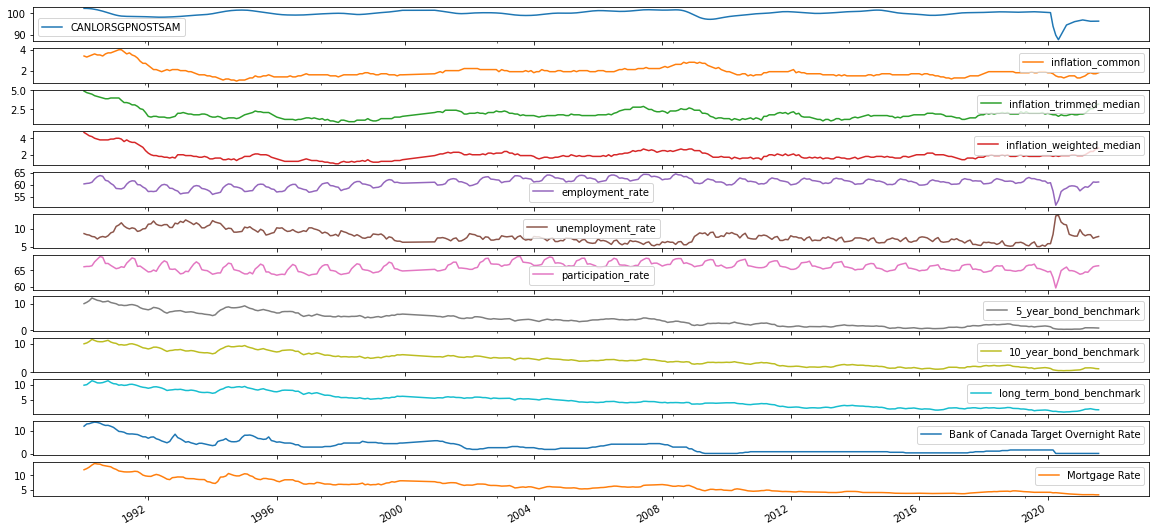

In [4]:
df.plot(subplots=True, figsize=(20,10))

In [5]:
df.corr()

,CANLORSGPNOSTSAM,inflation_common,inflation_trimmed_median,inflation_weighted_median,employment_rate,unemployment_rate,participation_rate,5_year_bond_benchmark,10_year_bond_benchmark,long_term_bond_benchmark,Bank of Canada Target Overnight Rate,Mortgage Rate
CANLORSGPNOSTSAM,1.000000,0.066354,0.121322,0.054262,0.467813,-0.513662,0.266261,0.188699,0.171352,0.139199,0.232898,0.165441
inflation_common,0.066354,1.000000,0.800425,0.858555,0.240865,0.011402,0.382232,0.433420,0.415328,0.397803,0.551937,0.514701
inflation_trimmed_median,0.121322,0.800425,1.000000,0.961644,0.186527,-0.043774,0.248164,0.397166,0.357829,0.326662,0.574478,0.475627
inflation_weighted_median,0.054262,0.858555,0.961644,1.000000,0.199430,-0.006731,0.301889,0.368015,0.337665,0.314625,0.539126,0.458413
employment_rate,0.467813,0.240865,0.186527,0.199430,1.000000,-0.791967,0.838577,-0.288068,-0.302086,-0.331565,-0.200266,-0.267527
unemployment_rate,-0.513662,0.011402,-0.043774,-0.006731,-0.791967,1.000000,-0.332456,0.522367,0.557669,0.595892,0.383318,0.515241
participation_rate,0.266261,0.382232,0.248164,0.301889,0.838577,-0.332456,1.000000,0.020974,0.031058,0.019738,0.031845,0.046586
5_year_bond_benchmark,0.188699,0.433420,0.397166,0.368015,-0.288068,0.522367,0.020974,1.000000,0.993858,0.983117,0.935290,0.984746
10_year_bond_benchmark,0.171352,0.415328,0.357829,0.337665,-0.302086,0.557669,0.031058,0.993858,1.000000,0.996626,0.904165,0.976229
long_term_bond_benchmark,0.139199,0.397803,0.326662,0.314625,-0.331565,0.595892,0.019738,0.983117,0.996626,1.000000,0.882342,0.966596


In [6]:
df_input = df[['Mortgage Rate', 'inflation_common', 'unemployment_rate', '5_year_bond_benchmark', 'Bank of Canada Target Overnight Rate']]
df_input.head()

,Mortgage Rate,inflation_common,unemployment_rate,5_year_bond_benchmark,Bank of Canada Target Overnight Rate
1990-01-01,12.01,3.4,8.7,10.045000,12.04
1990-02-01,12.42,3.3,8.4,10.538182,13.00
1990-03-01,12.92,3.4,8.3,11.147692,13.13
1990-04-01,13.67,3.5,7.9,12.175000,13.52
1990-05-01,14.21,3.6,7.8,11.741538,13.80


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

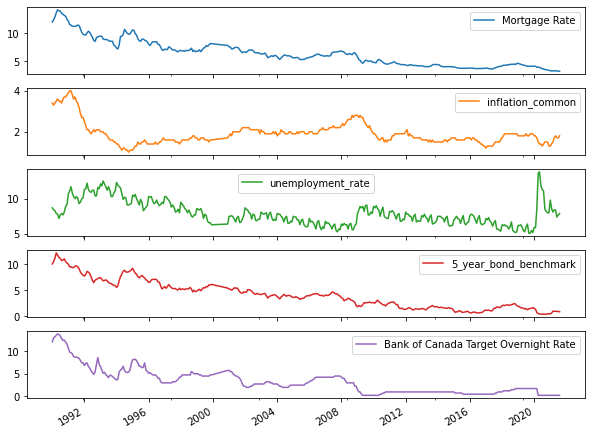

In [7]:
df_input.plot(subplots=True)

In [8]:
df_input.describe()

,Mortgage Rate,inflation_common,unemployment_rate,5_year_bond_benchmark,Bank of Canada Target Overnight Rate
count,369.000000,369.000000,369.000000,369.000000,369.000000
mean,6.300271,1.896477,7.924661,4.045323,3.251111
std,2.410959,0.537975,1.702049,2.712082,2.848453
min,3.200000,1.000000,5.100000,0.347727,0.250000
25%,4.270000,1.600000,6.700000,1.634500,1.000000
50%,5.950000,1.800000,7.600000,3.888095,2.750000
75%,7.420000,2.000000,8.800000,5.495000,4.650000
max,14.210000,4.000000,13.800000,12.175000,13.800000


In [9]:
scaler=MinMaxScaler()

data_scaled = scaler.fit_transform(df_input)

In [10]:
features = data_scaled
target = data_scaled[:,0]

In [11]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.80018165, 0.8       , 0.4137931 , 0.81990776, 0.8701107 ],
         [0.83742053, 0.76666667, 0.37931034, 0.86160646, 0.94095941]]]),
 array([0.88283379]))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle=False)

In [13]:
X_train.shape

(295, 5)

In [14]:
X_test.shape

(74, 5)

In [15]:
win_length = 3
batch_size = 12
num_features =5

train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)
future_generator = TimeseriesGenerator(features, target, length=win_length, sampling_rate=1, batch_size=batch_size)

In [16]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            68608     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 128)            131584    
                                                                 
 dropout (Dropout)           (None, 3, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, mode="min")

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit(train_generator, epochs=45,
                              validation_data =test_generator,
                              shuffle=False,
                              callbacks=[early_stopping])
              

Epoch 1/45
25/25 [==============================] - 4s 35ms/step - loss: 0.1045 - mean_absolute_error: 0.2442 - val_loss: 0.0149 - val_mean_absolute_error: 0.1154
Epoch 2/45
25/25 [==============================] - 0s 6ms/step - loss: 0.0219 - mean_absolute_error: 0.1098 - val_loss: 0.0052 - val_mean_absolute_error: 0.0626
Epoch 3/45
25/25 [==============================] - 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0748 - val_loss: 0.0016 - val_mean_absolute_error: 0.0269
Epoch 4/45
25/25 [==============================] - 0s 6ms/step - loss: 0.0035 - mean_absolute_error: 0.0451 - val_loss: 0.0025 - val_mean_absolute_error: 0.0378
Epoch 5/45
25/25 [==============================] - 0s 5ms/step - loss: 0.0139 - mean_absolute_error: 0.0976 - val_loss: 0.0093 - val_mean_absolute_error: 0.0898
Epoch 6/45
25/25 [==============================] - 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0484 - val_loss: 0.0027 - val_mean_absolute_error: 0.0452
Epoch 7/45
25/25 [=========

In [19]:
model.evaluate(test_generator, verbose=0)

[0.0001229856861755252, 0.00874426681548357]

In [20]:
predictions=model.predict(test_generator)

In [21]:
predictions.shape[0]

71

In [22]:
X_test[:,1:][win_length:]

array([[2.33333333e-01, 1.37931034e-01, 3.99308224e-02, 1.84501845e-02],
       [2.33333333e-01, 1.72413793e-01, 5.06687164e-02, 1.84501845e-02],
       [2.33333333e-01, 1.83908046e-01, 3.83606017e-02, 1.84501845e-02],
       [2.33333333e-01, 2.87356322e-01, 2.54727133e-02, 1.84501845e-02],
       [2.00000000e-01, 3.10344828e-01, 2.09069946e-02, 1.84501845e-02],
       [2.33333333e-01, 2.98850575e-01, 3.09761722e-02, 1.84501845e-02],
       [2.33333333e-01, 2.75862069e-01, 3.64280224e-02, 1.84501845e-02],
       [2.00000000e-01, 2.18390805e-01, 3.33681051e-02, 1.84501845e-02],
       [2.00000000e-01, 1.60919540e-01, 2.32129131e-02, 1.84501845e-02],
       [1.66666667e-01, 2.41379310e-01, 2.19215988e-02, 1.84501845e-02],
       [1.66666667e-01, 2.87356322e-01, 2.48270561e-02, 1.84501845e-02],
       [1.33333333e-01, 1.60919540e-01, 2.71274844e-02, 1.84501845e-02],
       [1.33333333e-01, 1.37931034e-01, 3.01652575e-02, 1.84501845e-02],
       [1.00000000e-01, 1.49425287e-01, 4.51246294e

In [23]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:,1:][win_length:])],axis=1)

In [24]:
rev_trans=scaler.inverse_transform(df_pred)

In [25]:
rev_trans

array([[ 3.64693912,  1.7       ,  6.3       ,  0.82      ,  0.5       ],
       [ 3.63463691,  1.7       ,  6.6       ,  0.947     ,  0.5       ],
       [ 3.6664859 ,  1.7       ,  6.7       ,  0.80142857,  0.5       ],
       [ 3.6933999 ,  1.7       ,  7.6       ,  0.649     ,  0.5       ],
       [ 3.69403802,  1.6       ,  7.8       ,  0.595     ,  0.5       ],
       [ 3.66011874,  1.7       ,  7.7       ,  0.71409091,  0.5       ],
       [ 3.630768  ,  1.7       ,  7.5       ,  0.77857143,  0.5       ],
       [ 3.62623481,  1.6       ,  7.        ,  0.74238095,  0.5       ],
       [ 3.64939903,  1.6       ,  6.5       ,  0.62227273,  0.5       ],
       [ 3.63424431,  1.5       ,  7.2       ,  0.607     ,  0.5       ],
       [ 3.60010892,  1.5       ,  7.6       ,  0.64136364,  0.5       ],
       [ 3.57885393,  1.4       ,  6.5       ,  0.66857143,  0.5       ],
       [ 3.56154587,  1.4       ,  6.3       ,  0.7045    ,  0.5       ],
       [ 3.56036056,  1.3       ,  6.4

In [26]:
df_final=df_input[predictions.shape[0]*-1:]

In [27]:
df_final.count()

Mortgage Rate                           71
inflation_common                        71
unemployment_rate                       71
5_year_bond_benchmark                   71
Bank of Canada Target Overnight Rate    71
dtype: int64

In [28]:
df_final['Mortgage_Rate_Prediction']=rev_trans[:,0]

C:\Users\Curtis\AppData\Local\Temp/ipykernel_26044/1286119470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Mortgage_Rate_Prediction']=rev_trans[:,0]


<AxesSubplot:>

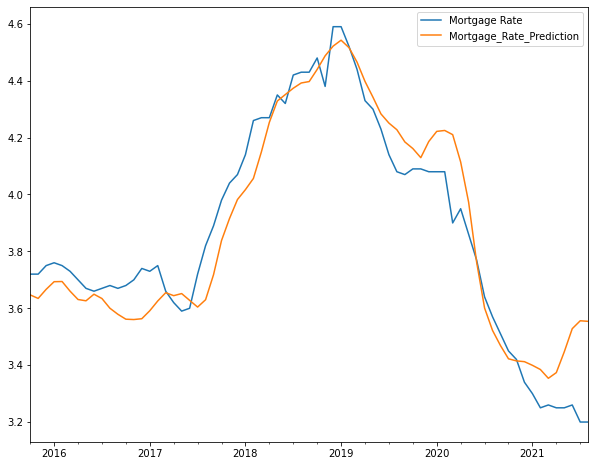

In [29]:
df_final[['Mortgage Rate', 'Mortgage_Rate_Prediction']].plot()

In [30]:
future_pred_data = tf.reshape(df_input, [None, 3, 5])

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

In [31]:
future = model.predict(future_generator)


array([[0.7417274 ],
       [0.779206  ],
       [0.8153872 ],
       [0.8410916 ],
       [0.83669865],
       [0.8178045 ],
       [0.80054176],
       [0.7841626 ],
       [0.7802961 ],
       [0.76954573],
       [0.7442532 ],
       [0.71678627],
       [0.6914199 ],
       [0.6692474 ],
       [0.65819263],
       [0.6440157 ],
       [0.6391314 ],
       [0.64123434],
       [0.6356288 ],
       [0.6186123 ],
       [0.5871648 ],
       [0.54838353],
       [0.52135444],
       [0.5105256 ],
       [0.5085623 ],
       [0.5197327 ],
       [0.5233397 ],
       [0.50466657],
       [0.47548968],
       [0.44087148],
       [0.41662574],
       [0.4148308 ],
       [0.44325453],
       [0.47581547],
       [0.48467535],
       [0.4709232 ],
       [0.4552771 ],
       [0.43566644],
       [0.42088073],
       [0.41611886],
       [0.40551162],
       [0.39185953],
       [0.38002443],
       [0.37485433],
       [0.3655671 ],
       [0.35046512],
       [0.3316363 ],
       [0.321

In [ ]:
n_future = 60
forecast_period_dates = 

In [54]:
prediction_copies = np.repeat(future, df_input.shape[1], axis=-1)
prediction_copies

array([[0.7417274 , 0.7417274 , 0.7417274 , 0.7417274 , 0.7417274 ],
       [0.779206  , 0.779206  , 0.779206  , 0.779206  , 0.779206  ],
       [0.8153872 , 0.8153872 , 0.8153872 , 0.8153872 , 0.8153872 ],
       ...,
       [0.02981622, 0.02981622, 0.02981622, 0.02981622, 0.02981622],
       [0.03233895, 0.03233895, 0.03233895, 0.03233895, 0.03233895],
       [0.0321505 , 0.0321505 , 0.0321505 , 0.0321505 , 0.0321505 ]],
      dtype=float32)

In [53]:
rev_trans_future=scaler.inverse_transform(prediction_copies)[:,0]
#real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
#y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

ValueError: Expected 2D array, got 1D array instead:
array=[0.7417274  0.779206   0.8153872  0.8410916  0.83669865 0.8178045
 0.80054176 0.7841626  0.7802961  0.76954573 0.7442532  0.71678627
 0.6914199  0.6692474  0.65819263 0.6440157  0.6391314  0.64123434
 0.6356288  0.6186123  0.5871648  0.54838353 0.52135444 0.5105256
 0.5085623  0.5197327  0.5233397  0.50466657 0.47548968 0.44087148
 0.41662574 0.4148308  0.44325453 0.47581547 0.48467535 0.4709232
 0.4552771  0.43566644 0.42088073 0.41611886 0.40551162 0.39185953
 0.38002443 0.37485433 0.3655671  0.35046512 0.3316363  0.32108998
 0.3233465  0.35904616 0.4132058  0.45380354 0.4738086  0.49145252
 0.48722202 0.4690528  0.46408004 0.47299522 0.49869412 0.5264693
 0.5339669  0.51617783 0.4934705  0.46783096 0.44268084 0.43254685
 0.43671    0.44235998 0.43517214 0.42252135 0.39536244 0.37916327
 0.36948335 0.37455487 0.3844239  0.38729924 0.38696033 0.38098383
 0.36559707 0.342673   0.32391858 0.29556283 0.28704053 0.29283112
 0.29562438 0.29671717 0.3055383  0.309909   0.29814956 0.28845727
 0.28426018 0.28112784 0.2762645  0.27601406 0.2833181  0.29337287
 0.2963089  0.3003515  0.29894775 0.29847884 0.3011248  0.3030162
 0.30927193 0.31253237 0.30729944 0.29390895 0.2954324  0.29122585
 0.29667848 0.29791152 0.29772025 0.29710865 0.30705607 0.31689858
 0.32045883 0.32874525 0.33222216 0.34313202 0.3481425  0.34550148
 0.3377931  0.33033365 0.3234377  0.31741142 0.3205337  0.32299948
 0.31984937 0.31215125 0.29372457 0.27315325 0.2608444  0.25561434
 0.25712007 0.2580626  0.26256993 0.2720583  0.2719814  0.2677667
 0.26151407 0.2545684  0.24795364 0.24584517 0.24600054 0.24204378
 0.23866695 0.24087818 0.24289678 0.24337836 0.23604675 0.22072935
 0.2125981  0.21972843 0.22251402 0.22368035 0.22312547 0.22279923
 0.21495675 0.19909303 0.19013803 0.19129649 0.2061855  0.2124151
 0.21570837 0.21057564 0.20822151 0.21142422 0.21225503 0.20778565
 0.20004667 0.19903521 0.19969256 0.200628   0.19581567 0.1881667
 0.18468662 0.18666352 0.18981661 0.19525851 0.20411764 0.21232791
 0.21808653 0.22589912 0.23225869 0.23632286 0.24289845 0.24936181
 0.25422758 0.2545978  0.251009   0.24781355 0.24586152 0.24481033
 0.24397542 0.24680334 0.24731655 0.24827455 0.25699812 0.26818445
 0.2797963  0.27996486 0.27649987 0.27440265 0.27287775 0.26798078
 0.26374847 0.2558155  0.24591614 0.234439   0.23079175 0.23105137
 0.23503633 0.23332648 0.22873561 0.22799538 0.22047754 0.20222051
 0.17798671 0.1578673  0.14450034 0.13521685 0.12828124 0.1330595
 0.14014354 0.13897517 0.136437   0.1341868  0.13373381 0.12646994
 0.12031638 0.11780145 0.11949872 0.1257236  0.13025738 0.12408467
 0.11908887 0.11125728 0.102015   0.09605136 0.09812999 0.10374872
 0.11125503 0.11630332 0.12301397 0.12697497 0.12630616 0.11938827
 0.10985654 0.10176535 0.0903523  0.08731968 0.08621804 0.08392473
 0.08351323 0.08505011 0.08631177 0.08516026 0.08516761 0.07811009
 0.07396553 0.07303406 0.07486776 0.07393302 0.07271702 0.07237265
 0.07247587 0.07114424 0.06838735 0.06536525 0.06565801 0.06984843
 0.07495167 0.08085951 0.08476679 0.08896454 0.08530113 0.084691
 0.08369569 0.08011379 0.07657501 0.07382052 0.0716848  0.07078885
 0.07123201 0.07023188 0.07012416 0.07283752 0.07125385 0.07015447
 0.06344836 0.05421988 0.04783369 0.04687151 0.04725603 0.04806535
 0.04484645 0.04059393 0.03947656 0.04236929 0.0448138  0.04487175
 0.04179098 0.03912516 0.03871343 0.04081735 0.0394409  0.0363405
 0.03440998 0.03283795 0.0327303  0.03299071 0.03553922 0.03865451
 0.04130795 0.04035287 0.04102018 0.03885767 0.03671274 0.03905451
 0.04705733 0.05794899 0.06497301 0.07104953 0.07421376 0.07778659
 0.08624982 0.09570029 0.102513   0.10457013 0.10659762 0.10827263
 0.10872911 0.11260582 0.11694533 0.12004143 0.12193367 0.11953889
 0.11493923 0.10877269 0.10371936 0.0983953  0.0954674  0.09333843
 0.0894441  0.08734321 0.08442099 0.08958431 0.09281772 0.09310638
 0.09176862 0.08303827 0.07018258 0.05113794 0.03641462 0.02924189
 0.02439795 0.0201906  0.01952356 0.01927832 0.01811529 0.01677313
 0.01396736 0.01578087 0.02243876 0.02981622 0.03233895 0.0321505 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [51]:
rev_trans_future

array([11.366418 , 11.7790575, 12.177412 , 12.460418 , 12.412052 ,
       12.204027 , 12.013965 , 11.83363  , 11.79106  , 11.672698 ,
       11.394227 , 11.091817 , 10.812533 , 10.568414 , 10.446701 ,
       10.290613 , 10.236837 , 10.259991 , 10.198274 , 10.0109215,
        9.664685 ,  9.237703 ,  8.940112 ,  8.820887 ,  8.799272 ,
        8.922257 ,  8.96197  ,  8.756379 ,  8.435142 ,  8.053995 ,
        7.78705  ,  7.7672873,  8.080233 ,  8.438728 ,  8.536276 ,
        8.384865 ,  8.212601 ,  7.996688 ,  7.833897 ,  7.781469 ,
        7.664683 ,  7.514374 ,  7.384069 ,  7.3271465,  7.224894 ,
        7.058621 ,  6.851316 ,  6.735201 ,  6.760045 ,  7.1530986,
        7.749396 ,  8.196377 ,  8.416633 ,  8.610892 ,  8.564315 ,
        8.364271 ,  8.309522 ,  8.407678 ,  8.690622 ,  8.996428 ,
        9.078976 ,  8.883118 ,  8.63311  ,  8.350819 ,  8.073916 ,
        7.962341 ,  8.008177 ,  8.070384 ,  7.9912453,  7.85196  ,
        7.5529404,  7.3745875,  7.268012 ,  7.323849 ,  7.4325